In [1]:
import os
os.environ['CUDA_DEVICE_ORDER']='PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES']='4,5,6,7'
import gc
import re
import json
import torch
import pickle
import string
import argparse
import subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import softmax
from collections import OrderedDict
from vllm import LLM, SamplingParams
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import StratifiedKFold
from transformers import AutoTokenizer, AutoModel, AutoModelForCausalLM, AutoConfig
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

/home/anils/.conda/envs/vllm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-02-28 11:24:41,343	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


# Run the pipeline - 8B Breast Experiments
---

## Zero Shot Full Notes

In [ ]:
for fold in range(1, 6):
    command = [
        "python3",
        "run_dynamic_prompt.py",
        "--exp_type", "breast_8B/zero_shot_fn",
        "--fold_number", str(fold),
        "--large", "False",
        "--num_gpus", "4",
        "--zero_shot", "True",
        "--examples", f"../../example_file_{fold}.csv",
        "--test_data", f"../../test_file_{fold}.csv",
        "--summary", "False",
        "--vector_db", "/data/llm_shared/jina_embs/jina_embs_breast.pkl",
        "--cancer_type", "breast"
    ]

    log_file = f"../../exp_logs/breast_8B/zero_shot_fn_fold_{fold}.txt"

    with open(log_file, "w") as log:
        result = subprocess.run(command, stdout=log, stderr=log)

    if result.returncode == 0:
        print(f"Fold {fold} executed successfully. Logs saved to {log_file}")
    else:
        print(f"Fold {fold} encountered an error. Check logs at {log_file}")



Fold 1 executed successfully. Logs saved to ../../exp_logs/breast_8B/zero_shot_fn_fold_1.txt
Fold 2 executed successfully. Logs saved to ../../exp_logs/breast_8B/zero_shot_fn_fold_2.txt
Fold 3 executed successfully. Logs saved to ../../exp_logs/breast_8B/zero_shot_fn_fold_3.txt
Fold 4 executed successfully. Logs saved to ../../exp_logs/breast_8B/zero_shot_fn_fold_4.txt
Fold 5 executed successfully. Logs saved to ../../exp_logs/breast_8B/zero_shot_fn_fold_5.txt


## Dynamic Full Notes

In [ ]:
for fold in range(1, 6):
    command = [
        "python3",
        "run_dynamic_prompt.py",
        "--exp_type", "breast_8B/dynamic_fn",
        "--fold_number", str(fold),
        "--large", "False",
        "--num_gpus", "4",
        "--zero_shot", "False",
        "--examples", f"../../example_file_{fold}.csv",
        "--test_data", f"../../test_file_{fold}.csv",
        "--summary", "False",
        "--vector_db", "/data/llm_shared/jina_embs/jina_embs_breast.pkl",
        "--cancer_type", "breast"
    ]

    log_file = f"../../exp_logs/breast_8B/dynamic_fn_fold_{fold}.txt"

    with open(log_file, "w") as log:
        result = subprocess.run(command, stdout=log, stderr=log)

    if result.returncode == 0:
        print(f"Fold {fold} executed successfully. Logs saved to {log_file}")
    else:
        print(f"Fold {fold} encountered an error. Check logs at {log_file}")

Fold 1 executed successfully. Logs saved to ../../exp_logs/breast_8B/dynamic_fn_fold_1.txt
Fold 2 executed successfully. Logs saved to ../../exp_logs/breast_8B/dynamic_fn_fold_2.txt
Fold 3 executed successfully. Logs saved to ../../exp_logs/breast_8B/dynamic_fn_fold_3.txt
Fold 4 executed successfully. Logs saved to ../../exp_logs/breast_8B/dynamic_fn_fold_4.txt
Fold 5 executed successfully. Logs saved to ../../exp_logs/breast_8B/dynamic_fn_fold_5.txt


## Zero Shot Summary

In [ ]:
for fold in range(1, 6):
    command = [
        "python3",
        "run_dynamic_prompt.py",
        "--exp_type", "breast_8B/zero_shot_summary",
        "--fold_number", str(fold),
        "--large", "False",
        "--num_gpus", "4",
        "--zero_shot", "True",
        "--examples", f"../../example_file_{fold}.csv",
        "--test_data", f"../../test_file_{fold}.csv",
        "--summary", "True",
        "--cancer_type", "breast"
    ]

    log_file = f"../../exp_logs/breast_8B/zero_shot_summary_fold_{fold}.txt"

    with open(log_file, "w") as log:
        result = subprocess.run(command, stdout=log, stderr=log)

    if result.returncode == 0:
        print(f"Fold {fold} executed successfully. Logs saved to {log_file}")
    else:
        print(f"Fold {fold} encountered an error. Check logs at {log_file}")


Fold 1 executed successfully. Logs saved to ../../exp_logs/breast_8B/zero_shot_summary_fold_1.txt
Fold 2 executed successfully. Logs saved to ../../exp_logs/breast_8B/zero_shot_summary_fold_2.txt
Fold 3 executed successfully. Logs saved to ../../exp_logs/breast_8B/zero_shot_summary_fold_3.txt
Fold 4 executed successfully. Logs saved to ../../exp_logs/breast_8B/zero_shot_summary_fold_4.txt
Fold 5 executed successfully. Logs saved to ../../exp_logs/breast_8B/zero_shot_summary_fold_5.txt


## Dynamic Summary

In [ ]:
for fold in range(1, 6):
    command = [
        "python3",
        "run_dynamic_prompt.py",
        "--exp_type", "breast_8B/dynamic_summary",
        "--fold_number", str(fold),
        "--large", "False",
        "--num_gpus", "4",
        "--zero_shot", "False",
        "--examples", f"../../example_file_{fold}.csv",
        "--test_data", f"../../test_file_{fold}.csv",
        "--summary", "True",
        "--cancer_type", "breast"
    ]

    log_file = f"../../exp_logs/breast_8B/dynamic_summary_fold_{fold}.txt"

    with open(log_file, "w") as log:
        result = subprocess.run(command, stdout=log, stderr=log)

    if result.returncode == 0:
        print(f"Fold {fold} executed successfully. Logs saved to {log_file}")
    else:
        print(f"Fold {fold} encountered an error. Check logs at {log_file}")

Fold 1 executed successfully. Logs saved to ../../exp_logs/breast_8B/dynamic_summary_fold_1.txt
Fold 2 executed successfully. Logs saved to ../../exp_logs/breast_8B/dynamic_summary_fold_2.txt
Fold 3 executed successfully. Logs saved to ../../exp_logs/breast_8B/dynamic_summary_fold_3.txt
Fold 4 executed successfully. Logs saved to ../../exp_logs/breast_8B/dynamic_summary_fold_4.txt
Fold 5 executed successfully. Logs saved to ../../exp_logs/breast_8B/dynamic_summary_fold_5.txt


# Run the pipeline - 70B Breast Experiments
---

## Zero Shot Full Notes

In [ ]:
for fold in range(1, 6):
    command = [
        "python3",
        "run_dynamic_prompt.py",
        "--exp_type", "breast_70B/zero_shot_fn",
        "--fold_number", str(fold),
        "--large", "True",
        "--num_gpus", "8",
        "--zero_shot", "True",
        "--examples", f"../../example_file_{fold}.csv",
        "--test_data", f"../../test_file_{fold}.csv",
        "--summary", "False",
        "--vector_db", "/data/llm_shared/jina_embs/jina_embs_breast.pkl",
        "--cancer_type", "breast"
    ]

    log_file = f"../../exp_logs/breast_70B/zero_shot_fn_fold_{fold}.txt"

    with open(log_file, "w") as log:
        result = subprocess.run(command, stdout=log, stderr=log)

    if result.returncode == 0:
        print(f"Fold {fold} executed successfully. Logs saved to {log_file}")
    else:
        print(f"Fold {fold} encountered an error. Check logs at {log_file}")

Fold 1 executed successfully. Logs saved to ../../exp_logs/breast_70B/zero_shot_fn_fold_1.txt
Fold 2 executed successfully. Logs saved to ../../exp_logs/breast_70B/zero_shot_fn_fold_2.txt
Fold 3 executed successfully. Logs saved to ../../exp_logs/breast_70B/zero_shot_fn_fold_3.txt
Fold 4 executed successfully. Logs saved to ../../exp_logs/breast_70B/zero_shot_fn_fold_4.txt
Fold 5 executed successfully. Logs saved to ../../exp_logs/breast_70B/zero_shot_fn_fold_5.txt


## Dynamic Full Notes

In [ ]:
for fold in range(1, 6):
    command = [
        "python3",
        "run_dynamic_prompt.py",
        "--exp_type", "breast_70B/dynamic_fn",
        "--fold_number", str(fold),
        "--large", "True",
        "--num_gpus", "8",
        "--zero_shot", "False",
        "--examples", f"../../example_file_{fold}.csv",
        "--test_data", f"../../test_file_{fold}.csv",
        "--summary", "False",
        "--vector_db", "/data/llm_shared/jina_embs/jina_embs_breast.pkl",
        "--cancer_type", "breast"
    ]

    log_file = f"../../exp_logs/breast_70B/dynamic_fn_fold_{fold}.txt"

    with open(log_file, "w") as log:
        result = subprocess.run(command, stdout=log, stderr=log)

    if result.returncode == 0:
        print(f"Fold {fold} executed successfully. Logs saved to {log_file}")
    else:
        print(f"Fold {fold} encountered an error. Check logs at {log_file}")

Fold 1 executed successfully. Logs saved to ../../exp_logs/breast_70B/dynamic_fn_fold_1.txt
Fold 2 executed successfully. Logs saved to ../../exp_logs/breast_70B/dynamic_fn_fold_2.txt
Fold 3 executed successfully. Logs saved to ../../exp_logs/breast_70B/dynamic_fn_fold_3.txt
Fold 4 executed successfully. Logs saved to ../../exp_logs/breast_70B/dynamic_fn_fold_4.txt
Fold 5 executed successfully. Logs saved to ../../exp_logs/breast_70B/dynamic_fn_fold_5.txt


## Zero Shot Summary

In [ ]:
for fold in range(1, 6):
    command = [
        "python3",
        "run_dynamic_prompt.py",
        "--exp_type", "breast_70B/zero_shot_summary",
        "--fold_number", str(fold),
        "--large", "True",
        "--num_gpus", "8",
        "--zero_shot", "True",
        "--examples", f"../../example_file_{fold}.csv",
        "--test_data", f"../../test_file_{fold}.csv",
        "--summary", "True",
        "--cancer_type", "breast"
    ]

    log_file = f"../../exp_logs/breast_70B/zero_shot_summary_fold_{fold}.txt"

    with open(log_file, "w") as log:
        result = subprocess.run(command, stdout=log, stderr=log)

    if result.returncode == 0:
        print(f"Fold {fold} executed successfully. Logs saved to {log_file}")
    else:
        print(f"Fold {fold} encountered an error. Check logs at {log_file}")

Fold 1 executed successfully. Logs saved to ../../exp_logs/breast_70B/zero_shot_summary_fold_1.txt
Fold 2 executed successfully. Logs saved to ../../exp_logs/breast_70B/zero_shot_summary_fold_2.txt
Fold 3 executed successfully. Logs saved to ../../exp_logs/breast_70B/zero_shot_summary_fold_3.txt
Fold 4 executed successfully. Logs saved to ../../exp_logs/breast_70B/zero_shot_summary_fold_4.txt
Fold 5 executed successfully. Logs saved to ../../exp_logs/breast_70B/zero_shot_summary_fold_5.txt


## Dynamic Summary

In [ ]:
for fold in range(1, 6):
    command = [
        "python3",
        "run_dynamic_prompt.py",
        "--exp_type", "breast_70B/dynamic_summary",
        "--fold_number", str(fold),
        "--large", "True",
        "--num_gpus", "8",
        "--zero_shot", "False",
        "--examples", f"../../example_file_{fold}.csv",
        "--test_data", f"../../test_file_{fold}.csv",
        "--summary", "True",
        "--cancer_type", "breast"
    ]

    log_file = f"../../exp_logs/breast_70B/dynamic_summary_fold_{fold}.txt"

    with open(log_file, "w") as log:
        result = subprocess.run(command, stdout=log, stderr=log)

    if result.returncode == 0:
        print(f"Fold {fold} executed successfully. Logs saved to {log_file}")
    else:
        print(f"Fold {fold} encountered an error. Check logs at {log_file}")

Fold 1 executed successfully. Logs saved to ../../exp_logs/breast_70B/dynamic_summary_fold_1.txt
Fold 2 executed successfully. Logs saved to ../../exp_logs/breast_70B/dynamic_summary_fold_2.txt
Fold 3 executed successfully. Logs saved to ../../exp_logs/breast_70B/dynamic_summary_fold_3.txt
Fold 4 executed successfully. Logs saved to ../../exp_logs/breast_70B/dynamic_summary_fold_4.txt
Fold 5 executed successfully. Logs saved to ../../exp_logs/breast_70B/dynamic_summary_fold_5.txt


# Run the pipeline - 8B Glioma Experiments
---

## Zero Shot Full Notes

In [ ]:
for fold in range(1, 6):
    command = [
        "python3",
        "run_dynamic_prompt.py",
        "--exp_type", "glioma_8B/zero_shot_fn",
        "--fold_number", str(fold),
        "--large", "False",
        "--num_gpus", "4",
        "--zero_shot", "True",
        "--examples", f"../../example_file_{fold}.csv",
        "--test_data", f"../../test_file_{fold}.csv",
        "--summary", "False",
        "--vector_db", "/data/llm_shared/jina_embs/jina_embs_glioma.pkl",
        "--cancer_type", "glioma"
    ]

    log_file = f"../../exp_logs/glioma_8B/zero_shot_fn_fold_{fold}.txt"

    with open(log_file, "w") as log:
        result = subprocess.run(command, stdout=log, stderr=log)

    if result.returncode == 0:
        print(f"Fold {fold} executed successfully. Logs saved to {log_file}")
    else:
        print(f"Fold {fold} encountered an error. Check logs at {log_file}")

Fold 1 executed successfully. Logs saved to ../../exp_logs/glioma_8B/zero_shot_fn_fold_1.txt
Fold 2 executed successfully. Logs saved to ../../exp_logs/glioma_8B/zero_shot_fn_fold_2.txt
Fold 3 executed successfully. Logs saved to ../../exp_logs/glioma_8B/zero_shot_fn_fold_3.txt
Fold 4 executed successfully. Logs saved to ../../exp_logs/glioma_8B/zero_shot_fn_fold_4.txt
Fold 5 executed successfully. Logs saved to ../../exp_logs/glioma_8B/zero_shot_fn_fold_5.txt


## Dynamic Full Notes

In [ ]:
for fold in range(1, 6):
    command = [
        "python3",
        "run_dynamic_prompt.py",
        "--exp_type", "glioma_8B/zero_shot_fn",
        "--fold_number", str(fold),
        "--large", "False",
        "--num_gpus", "4",
        "--zero_shot", "False",
        "--examples", f"../../example_file_{fold}.csv",
        "--test_data", f"../../test_file_{fold}.csv",
        "--summary", "False",
        "--vector_db", "/data/llm_shared/jina_embs/jina_embs_glioma.pkl",
        "--cancer_type", "glioma"
    ]

    log_file = f"../../exp_logs/glioma_8B/dynamic_fn_fold_{fold}.txt"

    with open(log_file, "w") as log:
        result = subprocess.run(command, stdout=log, stderr=log)

    if result.returncode == 0:
        print(f"Fold {fold} executed successfully. Logs saved to {log_file}")
    else:
        print(f"Fold {fold} encountered an error. Check logs at {log_file}")

Fold 1 executed successfully. Logs saved to ../../exp_logs/glioma_8B/dynamic_fn_fold_1.txt
Fold 2 executed successfully. Logs saved to ../../exp_logs/glioma_8B/dynamic_fn_fold_2.txt
Fold 3 executed successfully. Logs saved to ../../exp_logs/glioma_8B/dynamic_fn_fold_3.txt
Fold 4 executed successfully. Logs saved to ../../exp_logs/glioma_8B/dynamic_fn_fold_4.txt
Fold 5 executed successfully. Logs saved to ../../exp_logs/glioma_8B/dynamic_fn_fold_5.txt


## Zero Shot Summary

In [ ]:
for fold in range(1, 6):
    command = [
        "python3",
        "run_dynamic_prompt.py",
        "--exp_type", "glioma_8B/zero_shot_summary",
        "--fold_number", str(fold),
        "--large", "False",
        "--num_gpus", "4",
        "--zero_shot", "True",
        "--examples", f"../../example_file_{fold}.csv",
        "--test_data", f"../../test_file_{fold}.csv",
        "--summary", "True",
        "--cancer_type", "glioma"
    ]

    log_file = f"../../exp_logs/glioma_8B/zero_shot_summary_fold_{fold}.txt"

    with open(log_file, "w") as log:
        result = subprocess.run(command, stdout=log, stderr=log)

    if result.returncode == 0:
        print(f"Fold {fold} executed successfully. Logs saved to {log_file}")
    else:
        print(f"Fold {fold} encountered an error. Check logs at {log_file}")

Fold 1 executed successfully. Logs saved to ../../exp_logs/glioma_8B/zero_shot_summary_fold_1.txt
Fold 2 executed successfully. Logs saved to ../../exp_logs/glioma_8B/zero_shot_summary_fold_2.txt
Fold 3 executed successfully. Logs saved to ../../exp_logs/glioma_8B/zero_shot_summary_fold_3.txt
Fold 4 executed successfully. Logs saved to ../../exp_logs/glioma_8B/zero_shot_summary_fold_4.txt
Fold 5 executed successfully. Logs saved to ../../exp_logs/glioma_8B/zero_shot_summary_fold_5.txt


## Dynamic Summary

In [ ]:
for fold in range(1, 6):
    command = [
        "python3",
        "run_dynamic_prompt.py",
        "--exp_type", "glioma_8B/dynamic_summary",
        "--fold_number", str(fold),
        "--large", "False",
        "--num_gpus", "4",
        "--zero_shot", "False",
        "--examples", f"../../example_file_{fold}.csv",
        "--test_data", f"../../test_file_{fold}.csv",
        "--summary", "True",
        "--cancer_type", "glioma"
    ]

    log_file = f"../../exp_logs/glioma_8B/dynamic_summary_fold_{fold}.txt"

    with open(log_file, "w") as log:
        result = subprocess.run(command, stdout=log, stderr=log)

    if result.returncode == 0:
        print(f"Fold {fold} executed successfully. Logs saved to {log_file}")
    else:
        print(f"Fold {fold} encountered an error. Check logs at {log_file}")

Fold 1 executed successfully. Logs saved to ../../exp_logs/glioma_8B/dynamic_summary_fold_1.txt
Fold 2 executed successfully. Logs saved to ../../exp_logs/glioma_8B/dynamic_summary_fold_2.txt
Fold 3 executed successfully. Logs saved to ../../exp_logs/glioma_8B/dynamic_summary_fold_3.txt
Fold 4 executed successfully. Logs saved to ../../exp_logs/glioma_8B/dynamic_summary_fold_4.txt
Fold 5 executed successfully. Logs saved to ../../exp_logs/glioma_8B/dynamic_summary_fold_5.txt


# Run the pipeline - 70B Glioma Experiments
---

## Zero Shot Full Notes

In [ ]:
for fold in range(1, 6):
    command = [
        "python3",
        "run_dynamic_prompt.py",
        "--exp_type", "glioma_70B/zero_shot_fn",
        "--fold_number", str(fold),
        "--large", "True",
        "--num_gpus", "8",
        "--zero_shot", "True",
        "--examples", f"../../example_file_{fold}.csv",
        "--test_data", f"../../test_file_{fold}.csv",
        "--summary", "False",
        "--vector_db", "/data/llm_shared/jina_embs/jina_embs_glioma.pkl",
        "--cancer_type", "glioma"
    ]

    log_file = f"../../exp_logs/glioma_70B/zero_shot_fn_fold_{fold}.txt"

    with open(log_file, "w") as log:
        result = subprocess.run(command, stdout=log, stderr=log)

    if result.returncode == 0:
        print(f"Fold {fold} executed successfully. Logs saved to {log_file}")
    else:
        print(f"Fold {fold} encountered an error. Check logs at {log_file}")

Fold 1 executed successfully. Logs saved to ../../exp_logs/glioma_70B/zero_shot_fn_fold_1.txt
Fold 2 executed successfully. Logs saved to ../../exp_logs/glioma_70B/zero_shot_fn_fold_2.txt
Fold 3 executed successfully. Logs saved to ../../exp_logs/glioma_70B/zero_shot_fn_fold_3.txt
Fold 4 executed successfully. Logs saved to ../../exp_logs/glioma_70B/zero_shot_fn_fold_4.txt
Fold 5 executed successfully. Logs saved to ../../exp_logs/glioma_70B/zero_shot_fn_fold_5.txt


## Dynamic Full Notes

In [ ]:
for fold in range(1, 6):
    command = [
        "python3",
        "run_dynamic_prompt.py",
        "--exp_type", "glioma_70B/zero_shot_fn",
        "--fold_number", str(fold),
        "--large", "True",
        "--num_gpus", "8",
        "--zero_shot", "False",
        "--examples", f"../../example_file_{fold}.csv",
        "--test_data", f"../../test_file_{fold}.csv",
        "--summary", "False",
        "--vector_db", "/data/llm_shared/jina_embs/jina_embs_glioma.pkl",
        "--cancer_type", "glioma"
    ]

    log_file = f"../../exp_logs/glioma_70B/dynamic_fn_fold_{fold}.txt"

    with open(log_file, "w") as log:
        result = subprocess.run(command, stdout=log, stderr=log)

    if result.returncode == 0:
        print(f"Fold {fold} executed successfully. Logs saved to {log_file}")
    else:
        print(f"Fold {fold} encountered an error. Check logs at {log_file}")

Fold 1 executed successfully. Logs saved to ../../exp_logs/glioma_70B/dynamic_fn_fold_1.txt
Fold 2 executed successfully. Logs saved to ../../exp_logs/glioma_70B/dynamic_fn_fold_2.txt
Fold 3 executed successfully. Logs saved to ../../exp_logs/glioma_70B/dynamic_fn_fold_3.txt
Fold 4 executed successfully. Logs saved to ../../exp_logs/glioma_70B/dynamic_fn_fold_4.txt
Fold 5 executed successfully. Logs saved to ../../exp_logs/glioma_70B/dynamic_fn_fold_5.txt


## Zero Shot Summary

In [ ]:
for fold in range(1, 6):
    command = [
        "python3",
        "run_dynamic_prompt.py",
        "--exp_type", "glioma_70B/zero_shot_summary",
        "--fold_number", str(fold),
        "--large", "True",
        "--num_gpus", "8",
        "--zero_shot", "True",
        "--examples", f"../../example_file_{fold}.csv",
        "--test_data", f"../../test_file_{fold}.csv",
        "--summary", "True",
        "--cancer_type", "glioma"
    ]

    log_file = f"../../exp_logs/glioma_70B/zero_shot_summary_fold_{fold}.txt"

    with open(log_file, "w") as log:
        result = subprocess.run(command, stdout=log, stderr=log)

    if result.returncode == 0:
        print(f"Fold {fold} executed successfully. Logs saved to {log_file}")
    else:
        print(f"Fold {fold} encountered an error. Check logs at {log_file}")

Fold 1 executed successfully. Logs saved to ../../exp_logs/glioma_70B/zero_shot_summary_fold_1.txt
Fold 2 executed successfully. Logs saved to ../../exp_logs/glioma_70B/zero_shot_summary_fold_2.txt
Fold 3 executed successfully. Logs saved to ../../exp_logs/glioma_70B/zero_shot_summary_fold_3.txt
Fold 4 executed successfully. Logs saved to ../../exp_logs/glioma_70B/zero_shot_summary_fold_4.txt
Fold 5 executed successfully. Logs saved to ../../exp_logs/glioma_70B/zero_shot_summary_fold_5.txt


## Dynamic Summary

In [ ]:
for fold in range(1, 6):
    command = [
        "python3",
        "run_dynamic_prompt.py",
        "--exp_type", "glioma_70B/dynamic_summary",
        "--fold_number", str(fold),
        "--large", "True",
        "--num_gpus", "8",
        "--zero_shot", "False",
        "--examples", f"../../example_file_{fold}.csv",
        "--test_data", f"../../test_file_{fold}.csv",
        "--summary", "True",
        "--cancer_type", "glioma"
    ]

    log_file = f"../../exp_logs/glioma_70B/dynamic_summary_fold_{fold}.txt"

    with open(log_file, "w") as log:
        result = subprocess.run(command, stdout=log, stderr=log)

    if result.returncode == 0:
        print(f"Fold {fold} executed successfully. Logs saved to {log_file}")
    else:
        print(f"Fold {fold} encountered an error. Check logs at {log_file}")

Fold 1 executed successfully. Logs saved to ../../exp_logs/glioma_70B/dynamic_summary_fold_1.txt
Fold 2 executed successfully. Logs saved to ../../exp_logs/glioma_70B/dynamic_summary_fold_2.txt
Fold 3 executed successfully. Logs saved to ../../exp_logs/glioma_70B/dynamic_summary_fold_3.txt
Fold 4 executed successfully. Logs saved to ../../exp_logs/glioma_70B/dynamic_summary_fold_4.txt
Fold 5 executed successfully. Logs saved to ../../exp_logs/glioma_70B/dynamic_summary_fold_5.txt


# BREAST RESULTS
---

In [ ]:
with open("breast_metrics.json", "r") as file:
    json_data = json.load(file)

df_list = []
for key, values in json_data.items():
    temp_df = pd.DataFrame.from_dict(values, orient='index')
    temp_df.insert(0, "Model", key)
    df_list.append(temp_df)

df = pd.concat(df_list).reset_index().rename(columns={"index": "Level"})
df = df.drop("Level", axis=1)

summary_df = df.groupby("Model").agg(["mean", "std"])
summary_df.loc[:, summary_df.columns.get_level_values(1) == 'mean'] = summary_df.loc[:, summary_df.columns.get_level_values(1) == 'mean'].round(4)
summary_df.loc[:, summary_df.columns.get_level_values(1) == 'std'] = summary_df.loc[:, summary_df.columns.get_level_values(1) == 'std'].round(2)

combined_df = pd.DataFrame()
for metric in summary_df.columns.get_level_values(0).unique():
    combined_df[metric] = summary_df[[(metric, 'mean')]].astype(str).values.flatten() + " ± " + summary_df[[(metric, 'std')]].astype(str).values.flatten()

combined_df['Model'] = summary_df.index
combined_df = combined_df[['Model'] + [col for col in combined_df.columns if col != 'Model']]
combined_df


,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,breast_70B/dynamic_fn,0.8309 ± 0.02,0.8156 ± 0.02,0.9872 ± 0.01,0.9 ± 0.0,0.7736 ± 0.04
1,breast_70B/dynamic_summary,0.7985 ± 0.05,0.8657 ± 0.03,0.8759 ± 0.06,0.87 ± 0.03,0.7414 ± 0.06
2,breast_70B/zero_shot_fn,0.7774 ± 0.01,0.7765 ± 0.01,1.0 ± 0.0,0.9 ± 0.0,0.765 ± 0.05
3,breast_70B/zero_shot_summary,0.8204 ± 0.04,0.8661 ± 0.03,0.9095 ± 0.05,0.888 ± 0.03,0.7532 ± 0.07
4,breast_8B/dynamic_fn,0.825 ± 0.02,0.8338 ± 0.01,0.9666 ± 0.01,0.8948 ± 0.01,0.7405 ± 0.03
5,breast_8B/dynamic_summary,0.832 ± 0.02,0.8417 ± 0.03,0.9769 ± 0.01,0.9 ± 0.0,0.791 ± 0.05
6,breast_8B/zero_shot_fn,0.8267 ± 0.01,0.8416 ± 0.01,0.9562 ± 0.02,0.8955 ± 0.01,0.7431 ± 0.04
7,breast_8B/zero_shot_summary,0.8283 ± 0.02,0.8267 ± 0.02,0.9845 ± 0.02,0.898 ± 0.01,0.7455 ± 0.03


# GLIOMA RESULTS
---

In [95]:
with open("glioma_metrics.json", "r") as file:
    json_data = json.load(file)

df_list = []
for key, values in json_data.items():
    temp_df = pd.DataFrame.from_dict(values, orient='index')
    temp_df.insert(0, "Model", key)
    df_list.append(temp_df)

df = pd.concat(df_list).reset_index().rename(columns={"index": "Level"})
df = df.drop("Level", axis=1)

summary_df = df.groupby("Model").agg(["mean", "std"])
summary_df.loc[:, summary_df.columns.get_level_values(1) == 'mean'] = summary_df.loc[:, summary_df.columns.get_level_values(1) == 'mean'].round(4)
summary_df.loc[:, summary_df.columns.get_level_values(1) == 'std'] = summary_df.loc[:, summary_df.columns.get_level_values(1) == 'std'].round(2)

combined_df = pd.DataFrame()
for metric in summary_df.columns.get_level_values(0).unique():
    combined_df[metric] = summary_df[[(metric, 'mean')]].astype(str).values.flatten() + " ± " + summary_df[[(metric, 'std')]].astype(str).values.flatten()

combined_df['Model'] = summary_df.index
combined_df = combined_df[['Model'] + [col for col in combined_df.columns if col != 'Model']]
combined_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,glioma_70B/dynamic_fn,0.7071 ± 0.03,0.7369 ± 0.03,0.822 ± 0.05,0.7763 ± 0.03,0.7649 ± 0.05
1,glioma_70B/dynamic_summary,0.7537 ± 0.03,0.8311 ± 0.05,0.7568 ± 0.05,0.7906 ± 0.03,0.8132 ± 0.04
2,glioma_70B/zero_shot_fn,0.6168 ± 0.01,0.6159 ± 0.01,1.0 ± 0.0,0.7608 ± 0.01,0.7422 ± 0.05
3,glioma_70B/zero_shot_summary,0.6779 ± 0.04,0.7028 ± 0.03,0.8967 ± 0.03,0.7876 ± 0.02,0.5705 ± 0.14
4,glioma_8B/dynamic_fn,0.6779 ± 0.07,0.7667 ± 0.07,0.6852 ± 0.08,0.7 ± 0.07,0.7525 ± 0.07
5,glioma_8B/dynamic_summary,0.7537 ± 0.02,0.8218 ± 0.02,0.7669 ± 0.06,0.792 ± 0.03,0.7751 ± 0.02
6,glioma_8B/zero_shot_fn,0.6569 ± 0.04,0.6431 ± 0.02,0.9966 ± 0.01,0.8 ± 0.0,0.7479 ± 0.09
7,glioma_8B/zero_shot_summary,0.6548 ± 0.02,0.8427 ± 0.04,0.541 ± 0.04,0.658 ± 0.02,0.7534 ± 0.02


# Visualizations
---

In [107]:
from sklearn.manifold import TSNE
import matplotlib.colors as mcolors

def plot_tsne_with_survival(embeddings, survival, title='t-SNE with overall survival [years]', perplexity=30, learning_rate=200, n_iter=3000):
    # Compute t-SNE on the embeddings
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity,
                learning_rate=learning_rate, n_iter=n_iter)
    embeddings_tsne = tsne.fit_transform(embeddings)

    fig, ax = plt.subplots(figsize=(12, 8))
    #norm = mcolors.Normalize(vmin=0.5, vmax=3)
    scatter = ax.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=survival, cmap='coolwarm', alpha=0.6)
    cbar_ax = fig.add_axes([0.68, 0.23, 0.2, 0.03])
    #cbar_ax = fig.add_axes([0.15, 0.2, 0.2, 0.03])

    cbar = fig.colorbar(scatter, cax=cbar_ax, orientation='horizontal')
    cbar.set_label('Overall Survival (years)', labelpad=-57, fontsize=16)  

    tick_values = np.linspace(survival.min(), survival.max(), num=4)
    #tick_values = np.linspace(0.5, 3, num=4)
    cbar.set_ticks(tick_values)
    #cbar.set_ticklabels([f'{val:.1f}' for val in tick_values], fontsize=16)
    cbar.set_ticklabels(['2', '4', '6', '8 yrs'], fontsize=16)  
    
    ax.set_xlabel('t-SNE 1', fontsize=20)  
    ax.set_ylabel('t-SNE 2', fontsize=20)  
    ax.set_title(title, fontsize=22) 
    ax.grid(True)
    
    ax.tick_params(axis='both', which='major', labelsize=16) 
    
    plt.savefig('tsne_plot_survival.png', bbox_inches='tight', dpi=400)
    plt.show()
    plt.close()

In [90]:
def read_data(cancer_type):
    embeddings = pd.read_pickle(f"/data/llm_shared/jina_embs/jina_embs_{cancer_type}.pkl")
    num = 0 if cancer_type=='glioma' else 1
    data = pd.concat([pd.read_pickle(f"/data/datasets/outcome/{cancer_type}/{cancer_type}_train_180_{num}.pkl"),pd.read_pickle(f"/data/datasets/outcome/{cancer_type}/{cancer_type}_test_180_{num}.pkl")])
    return data, embeddings

In [100]:
data, embeddings = read_data('breast')

In [105]:
embeddings = [list(embs[0]) for embs in embeddings]

### Breast Cancer Embedding Visualization

/home/anils/.conda/envs/vllm/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


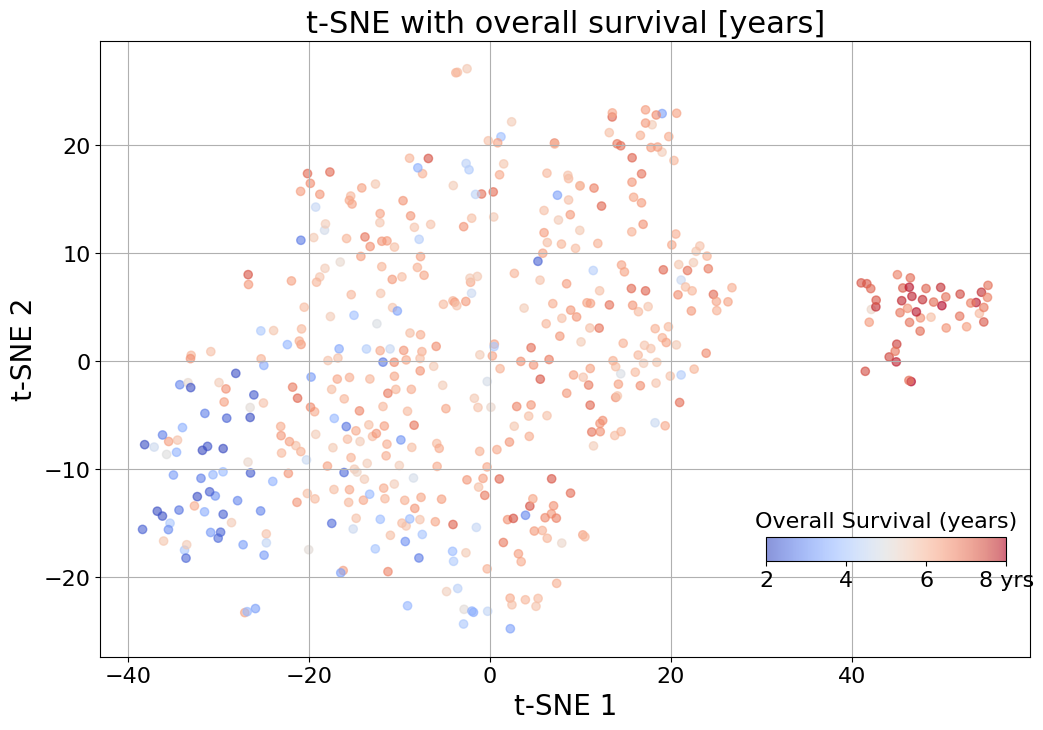

In [108]:
plot_tsne_with_survival(np.array(embeddings), data['overallsurvival'], perplexity=16, learning_rate=3, n_iter=2000)

In [71]:
from lifelines.statistics import logrank_test
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def format_p_value(p_value):
    """
    Format the p-value in a custom scientific notation using f-strings for clarity.
    """
    if p_value == 0:
        # For zero or very small p-values, adjust the representation.
        return r"$\mathit{p} < 1 \times 10^{-99}$"
    exponent = np.floor(np.log10(p_value))
    coefficient = p_value / 10**exponent
    return fr"$\mathit{{p}} < {coefficient:.1f} \times 10^{{{int(exponent)}}}$"

                                                   
def plot_tsne_with_term_and_p_value(embeddings, term_presence, overallsurvival, binary_outcome, term_name='DCIS', perplexity=30, learning_rate=200, n_iter=3000):
    # Perform p-value calculation
    merged_df = pd.DataFrame({'term_presence': term_presence, 'overallsurvival_x': overallsurvival, 'binary outcome': binary_outcome})
    group_with_term = merged_df[merged_df['term_presence'] == 1]
    group_without_term = merged_df[merged_df['term_presence'] == 0]
    results = logrank_test(
        durations_A=group_with_term['overallsurvival_x'].values,
        event_observed_A=group_with_term['binary outcome'].values,
        durations_B=group_without_term['overallsurvival_x'].values,
        event_observed_B=group_without_term['binary outcome'].values
    )
    p_value = results.p_value

    p_value_text = f"p < {np.format_float_scientific(p_value, precision=2, exp_digits=1)}"

    # TSNE Plot
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter)
    embeddings_tsne = tsne.fit_transform(embeddings)
    colors = np.where(term_presence, 'red', 'grey')

    fig, ax = plt.subplots(figsize=(12, 8))
    scatter = ax.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=colors, alpha=0.6, s=30)
    
    ax.set_xlabel('t-SNE 1', fontsize=25)
    ax.set_ylabel('t-SNE 2', fontsize=25)
    # Increase the size of the tick 
    ax.tick_params(axis='both', which='major', labelsize=20) 
    ax.set_title(r't-SNE with $\bf{' + term_name.replace(' ', r'\ ') + '}$', fontsize=28)
    ax.grid(True)
    ax.grid(True)

    legend_labels = ['Term not present', 'Term present']
    legend_colors = ['grey', 'red']
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=lc, markersize=8) for lc in legend_colors]
    ax.legend(handles, legend_labels, fontsize=20)

    formatted_p_value = format_p_value(p_value)
    ax.text(0.95, 0.05, formatted_p_value, fontsize=25, transform=ax.transAxes, horizontalalignment='right', verticalalignment='bottom', bbox=dict(facecolor='white', alpha=0.5))
    #filename = f'Glioma_tsne_plot_with_{term_name.replace(" ", "_")}_and_p-value.png'
    #plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.show()


In [63]:
keyword = ["HR\+", "leptomeningeal", "receptor negative", "lumpectomy"]
variations = [["HR\+", "ER positive", "PR positive", "hormones positive", "ER\+", "PR\+"], ["sclerosis", "metastasis"], ["ER negative", "Estrogen negative", "PR negative", "progesterone negative"], ['lumpectomy']]
term_name = ["HR+", 'metastasis', 'triple negative', 'lumpectomy']

patterns = []
for i,x in enumerate(keyword):
    patterns.append('|'.join([x] + variations[i]))

/home/anils/.conda/envs/vllm/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


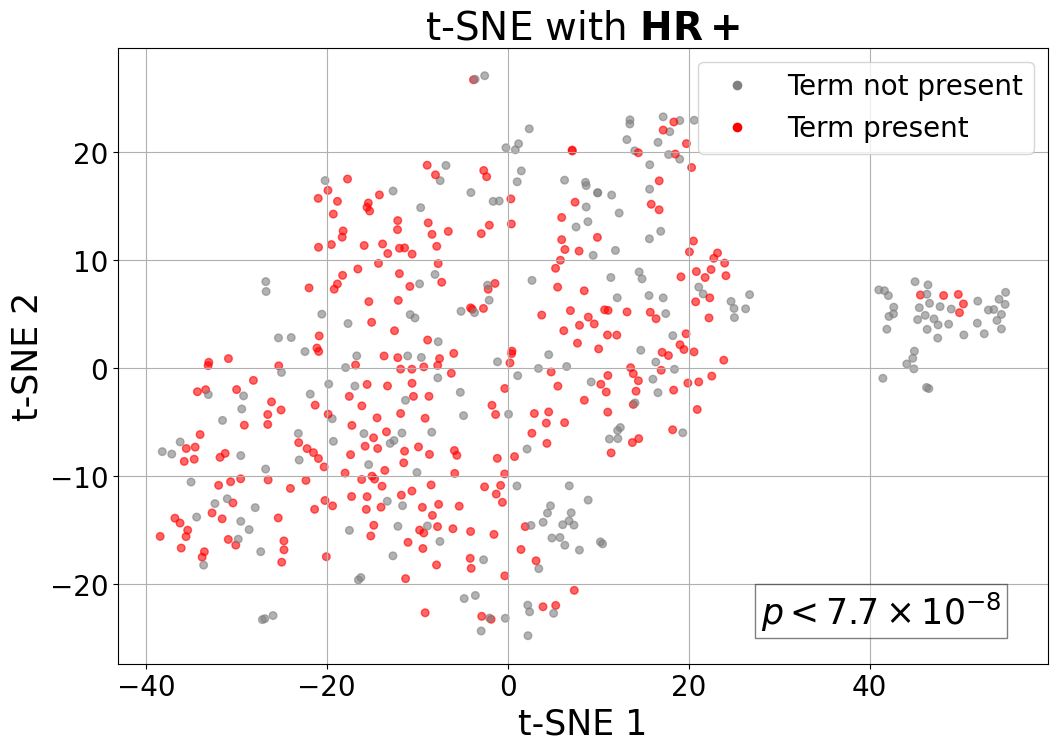

/home/anils/.conda/envs/vllm/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


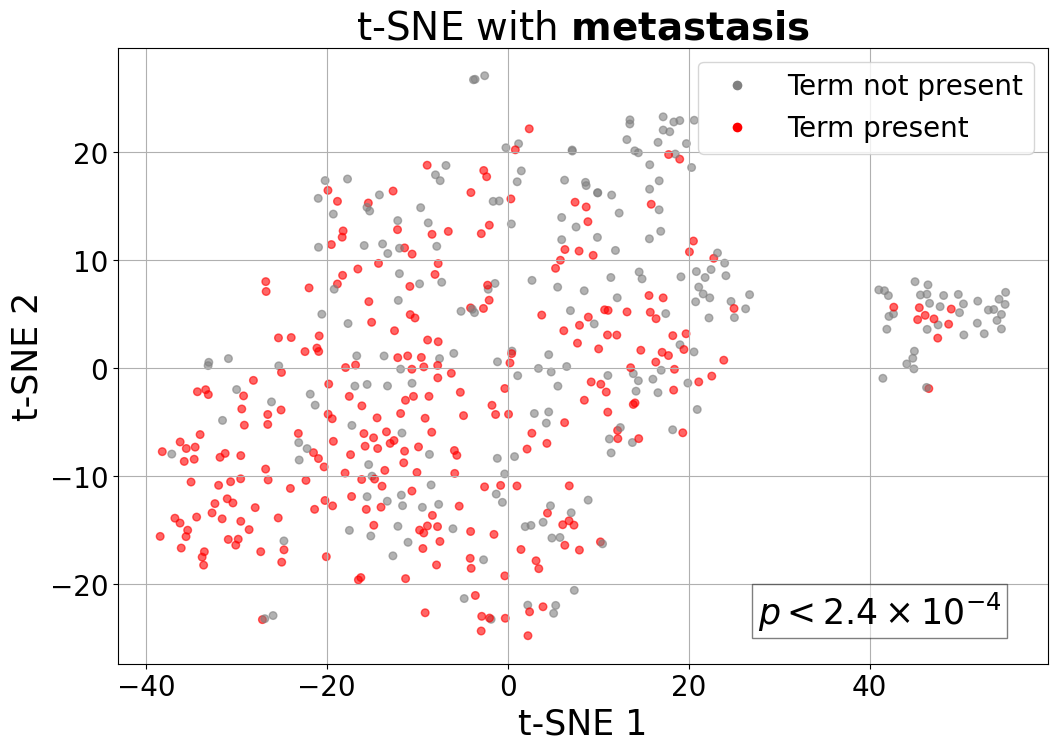

/home/anils/.conda/envs/vllm/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


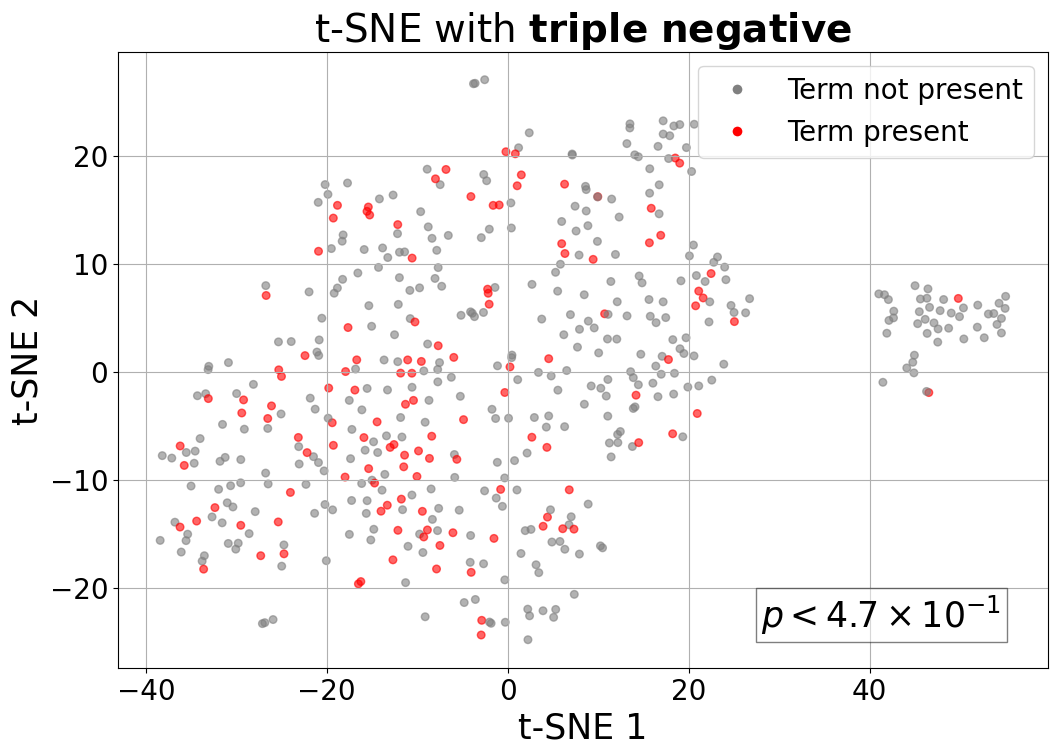

/home/anils/.conda/envs/vllm/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


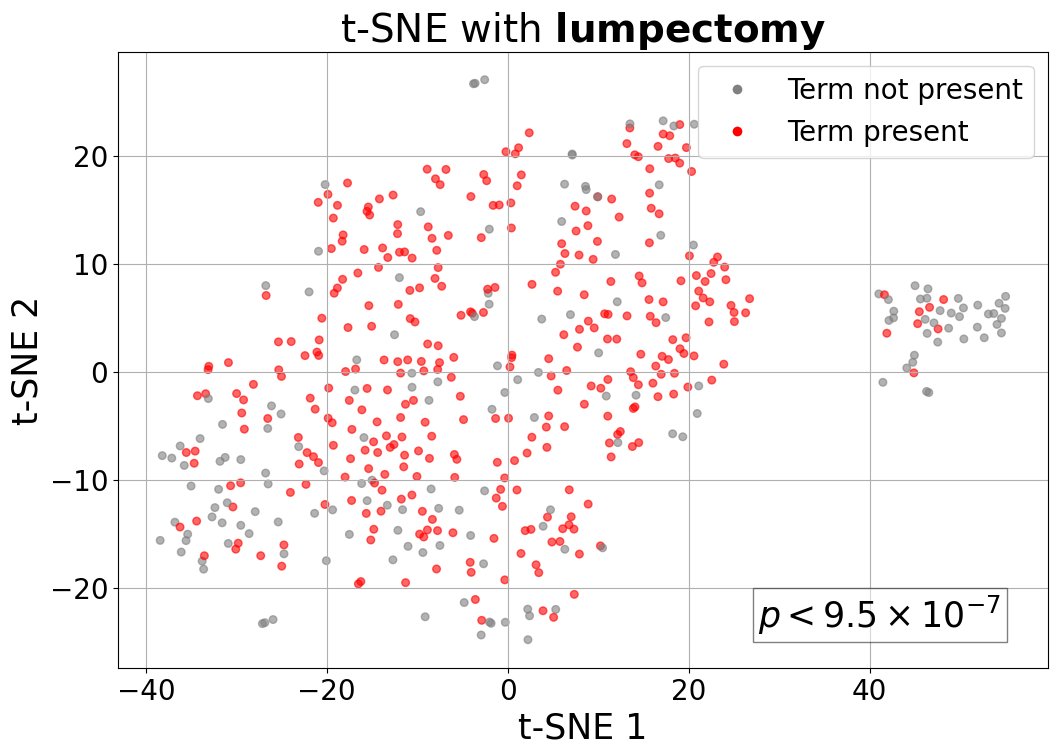

In [60]:
for i, p in enumerate(patterns):
    data['term_present'] = data['text'].str.contains(p, case=False, na=False)    
    term_present_integers = data['term_present'].astype(int).values
    overallsurvival_data = data['overallsurvival'].values
    binary_outcome_data = data['label'].values 
    plot_tsne_with_term_and_p_value(
        embeddings=np.array(embeddings),
        term_presence=term_present_integers,
        overallsurvival=overallsurvival_data,
        binary_outcome=binary_outcome_data,
        term_name=term_name[i],
        perplexity=16,
        learning_rate=3,
        n_iter=2000
    )



### Glioma Embedding Visualization

In [91]:
data, embeddings = read_data('glioma')

In [ ]:
def plot_tsne_with_survival(embeddings, survival, title='t-SNE with overall survival [years]', perplexity=30, learning_rate=200, n_iter=3000):
    # Compute t-SNE on the embeddings
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity,
                learning_rate=learning_rate, n_iter=n_iter)
    embeddings_tsne = tsne.fit_transform(embeddings)

    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Adjust the LogNorm parameters to better distribute the colors
    norm = mcolors.Normalize(vmin=0.5, vmax=3)
    scatter = ax.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=survival, cmap='coolwarm', norm=norm, alpha=0.6)
    
    # Create the colorbar
    cbar_ax = fig.add_axes([0.15, 0.2, 0.2, 0.03])
    cbar = fig.colorbar(scatter, cax=cbar_ax, orientation='horizontal')
    cbar.set_label('Overall Survival (yrs)', labelpad=-57, fontsize=20)
    
    # Define ticks based on the adjusted normalization range
    tick_values = np.linspace(0.5, 3, num=4)
    cbar.set_ticks(tick_values)
    cbar.set_ticklabels([f'{val:.1f}' for val in tick_values], fontsize=16)
    
    ax.set_xlabel('t-SNE 1', fontsize=25)
    ax.set_ylabel('t-SNE 2', fontsize=25)
    bold_title = r't-SNE with $\bf{overall\ survival}$ [years]'
    ax.set_title(bold_title, fontsize=28)
    ax.grid(True)
    
    ax.tick_params(axis='both', which='major', labelsize=20)
    
    plt.savefig('tsne_plot_survival_Glioma.png', bbox_inches='tight', dpi=300)
    plt.show()

/home/anils/.conda/envs/vllm/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


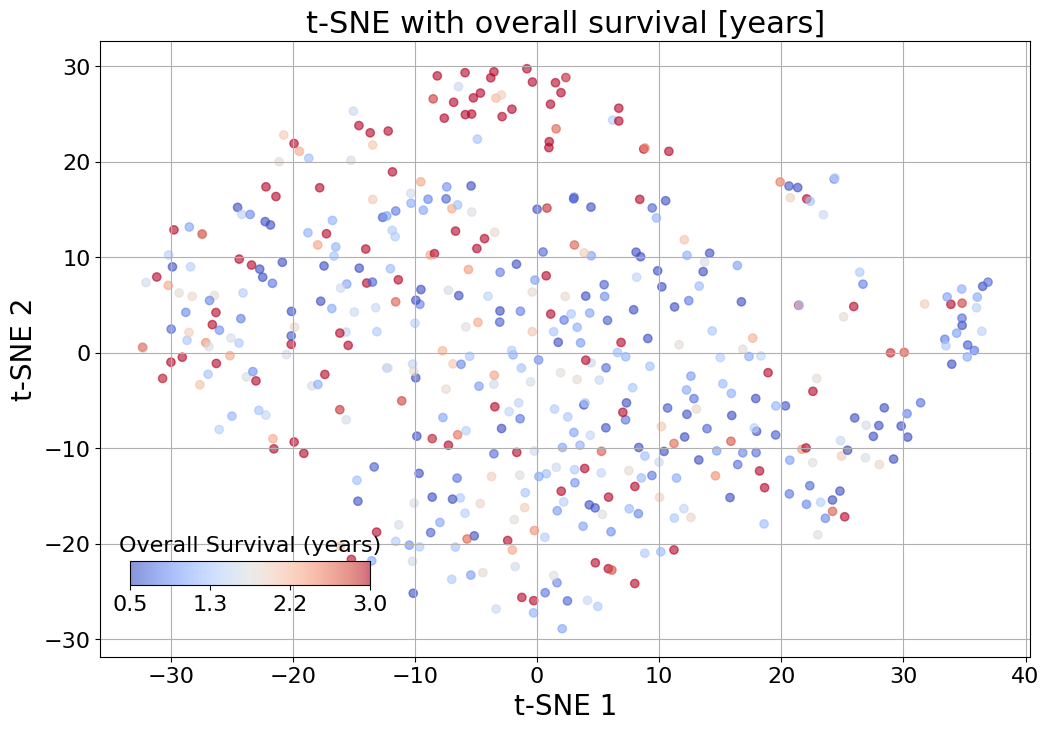

In [92]:
plot_tsne_with_survival(np.array(embeddings), data['overallsurvival'], perplexity=16, learning_rate=3, n_iter=2000)

In [93]:
keyword = ["unmethylated", "oligodendroglioma", "1p19q", "TERTp"]
variations = [["unmethylated", "MGMT unmethylated", "non-methylated"], ["oligodendroglioma", "oligo"], ["co-del", "co-deletion", "oligo"], ["multifocal"]]
term_name = ["MGMT unmethylated", "oligodendroglioma", "1p19q co-deletion", "multifocal"]

patterns = []
for i,x in enumerate(keyword):
    patterns.append('|'.join([x] + variations[i]))

/home/anils/.conda/envs/vllm/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


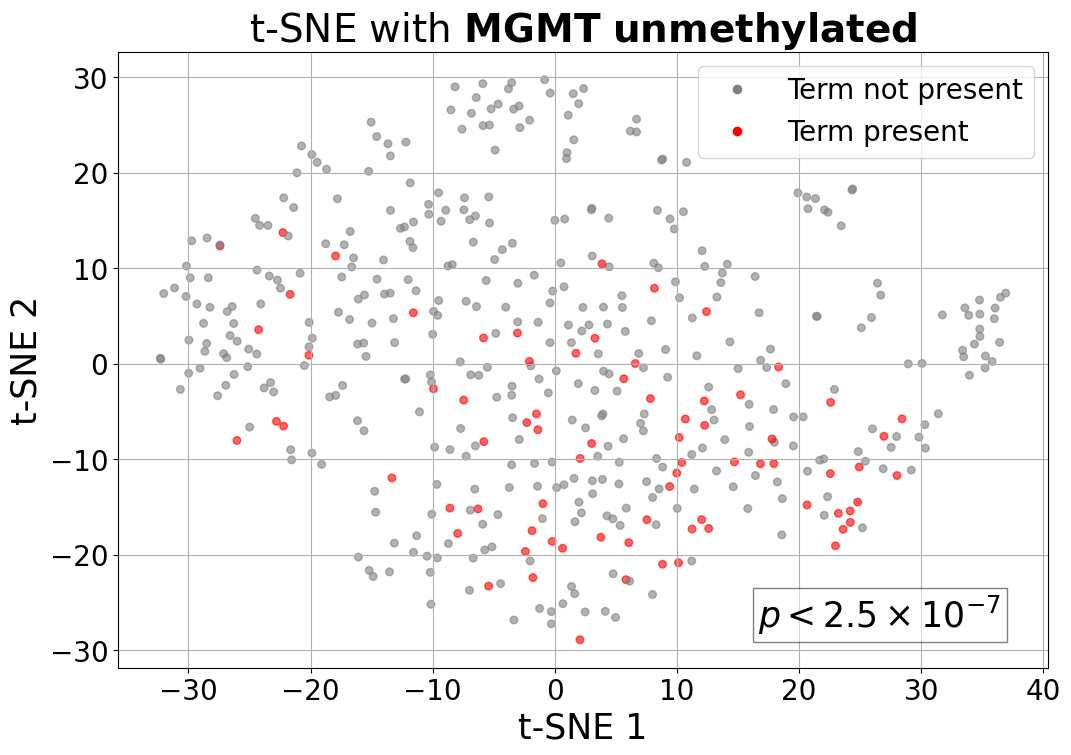

/home/anils/.conda/envs/vllm/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


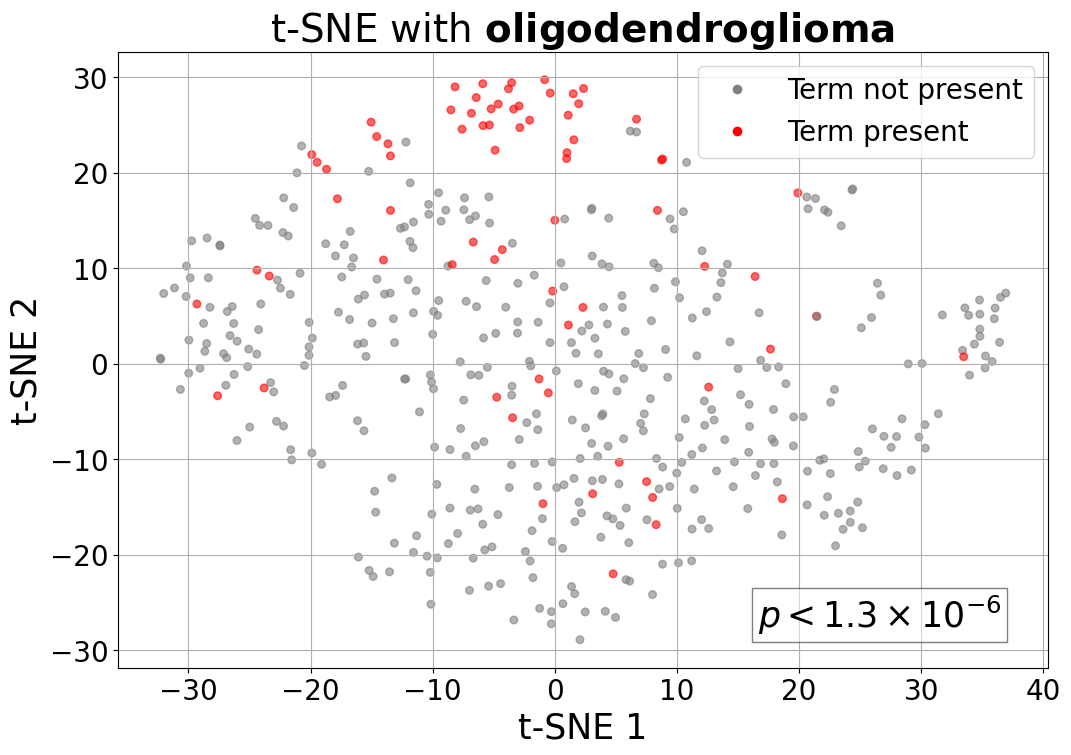

/home/anils/.conda/envs/vllm/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


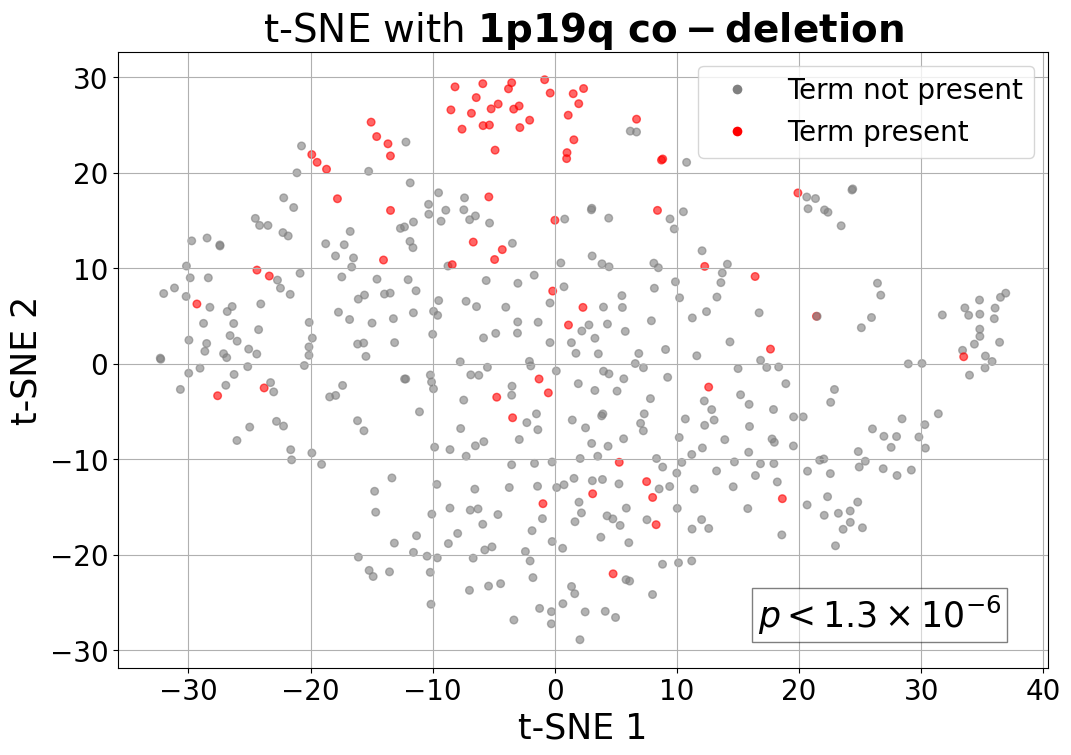

/home/anils/.conda/envs/vllm/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


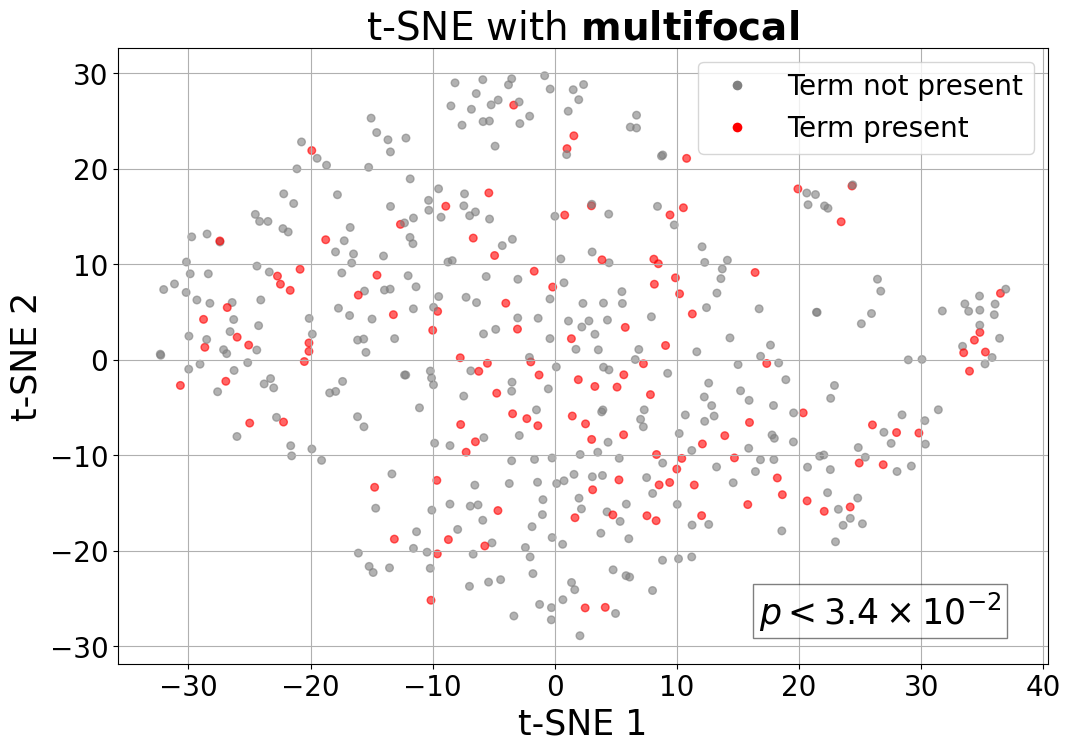

In [94]:
for i, p in enumerate(patterns):
    data['term_present'] = data['text'].str.contains(p, case=False, na=False)    
    term_present_integers = data['term_present'].astype(int).values
    overallsurvival_data = data['overallsurvival'].values
    binary_outcome_data = data['label'].values 
    plot_tsne_with_term_and_p_value(
        embeddings=np.array(embeddings),
        term_presence=term_present_integers,
        overallsurvival=overallsurvival_data,
        binary_outcome=binary_outcome_data,
        term_name=term_name[i],
        perplexity=16,
        learning_rate=3,
        n_iter=2000
    )
